In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
l = 12 # пролёт подкрановой балки, м
Fk = 258 # нагрузка от колеса крана, кН
d1 = 5 # расстояние между колёсами крана, м
b = 0.75 # консоль крана, м

In [3]:
def a(x):
  return Fk*(2*b+x) + Fk*x-Fk*(d1-x)

In [4]:
def R1(x):
  return Fk*(l/2 + a/2 +2*b)+Fk*(l/2 + a/2) + Fk*(l/2 + a/2 - d1) - x*l

In [5]:
def R2(x):
  return Fk*(l/2 + b/2) + Fk*(l/2 - 3 * b / 2) - x*l

In [6]:
def M1(x):
  if x < (l/2 - a/2 -2*b):
    M = R * x
  elif x < (l/2 - a/2):
    M = R * x - Fk * (x - (l/2 - a/2 - 2 * b))
  elif x < (l/2 - a/2 + d1):
    M = R * x - Fk * (x - (l/2 - a/2 - 2 * b)) - Fk * (x - (l/2 - a/2))
  else:
    M = R*x-Fk*(x-(l/2-a/2-2*b))-Fk*(x-(l/2-a/2))-Fk*(x-(l/2-a/2+d1))
  return M

In [7]:
def M2(x):
  if x < (l/2 - b/2):
    M = R * x
  elif x < (l/2 + 3*b/2):
    M = R * x - Fk * (x - (l/2 - b/2))
  else:
    M = R * x - Fk * (x - (l/2 - b/2)) - Fk * (x - (l/2 + 3*b/2))
  return M

In [8]:
def Q(x):
  return Fk*(l - 2*b) + Fk * (l - 2 * b - d1) - x * l

In [9]:
sol = root(a, 0)
a = sol.x[0]
print('a=', round(a, 3), 'м')

a= 1.167 м


In [10]:
if l/2+a/2-d1 > 0:
  sol = root(R1, 0)
  R = sol.x[0]
else:
  sol = root(R2, 0)
  R = sol.x[0]
  print('2 колеса на балке')
print('R=', round(R, 3), 'кН') # Реакция левой опоры

R= 349.375 кН


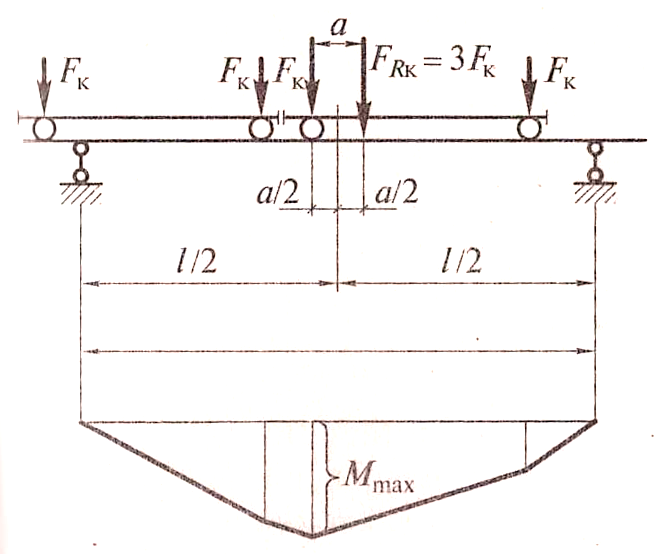

<function matplotlib.pyplot.show(close=None, block=None)>

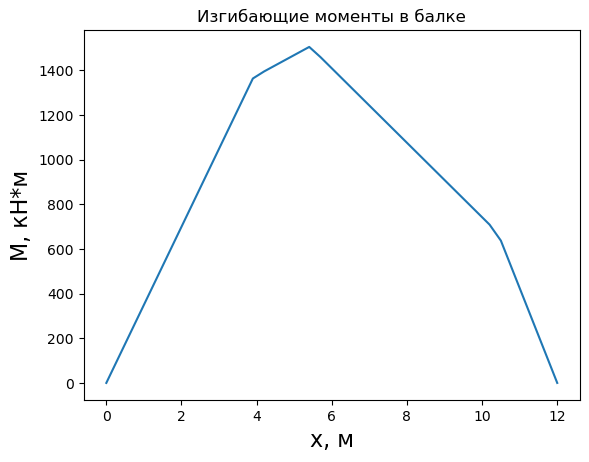

In [11]:
x = np.array(np.arange(0, l + 0.025 * l, 0.025 * l))
if l/2+a/2-d1 > 0:
  MV = np.vectorize(M1)
  Mmax = M1(l/2 - a/2)
else:
  MV = np.vectorize(M2)
  Mmax = M2(l/2 - b/2)
M = MV(x)
plt.plot(x, M)
plt.xlabel('x, м', fontsize=16)
plt.ylabel(r'M, кН*м', fontsize=16)
plt.title(r'Изгибающие моменты в балке')
plt.show

In [12]:
print('Mmax=', round(Mmax, 2), 'кН*м') # Максимальный изгибающий момент

Mmax= 1505.45 кН*м


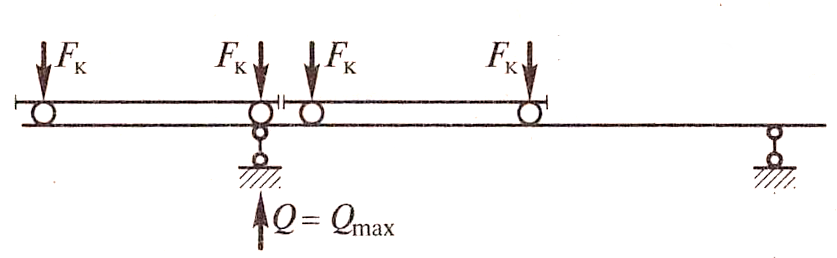

In [13]:
sol = root(Q, 0)
Qmax = sol.x[0]
print('Qmax=', round(Qmax, 2), 'кН') # Максимальная поперечная сила

Qmax= 344.0 кН
